CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
os.chdir('/content/drive/My Drive/Digital_Future_2021')

In [ ]:
df = pd.read_csv('result.csv',index_col = 0)
picpath = 'cnn_input/'

In [ ]:
import d2l

ModuleNotFoundError: ignored

In [ ]:
! pip install d2l

     |████████████████████████████████| 92kB 8.1MB/s 


Alex Net

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
def net():
    return tf.keras.models.Sequential([
        # 这里，我们使用一个11*11的更大窗口来捕捉对象。
        # 同时，步幅为4，以减少输出的高度和宽度。
        # 另外，输出通道的数目远大于LeNet
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4,
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        # 使用三个连续的卷积层和较小的卷积窗口。
        # 除了最后的卷积层，输出通道的数量进一步增加。
        # 在前两个卷积层之后，池化层不用于减少输入的高度和宽度
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
        tf.keras.layers.Flatten(),
        # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过度拟合
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
        tf.keras.layers.Dense(1000)])

In [ ]:
X = tf.random.uniform((1, 224, 224, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2D Output shape:	 (1, 54, 54, 96)
MaxPooling2D Output shape:	 (1, 26, 26, 96)
Conv2D Output shape:	 (1, 26, 26, 256)
MaxPooling2D Output shape:	 (1, 12, 12, 256)
Conv2D Output shape:	 (1, 12, 12, 384)
Conv2D Output shape:	 (1, 12, 12, 384)
Conv2D Output shape:	 (1, 12, 12, 256)
MaxPooling2D Output shape:	 (1, 5, 5, 256)
Flatten Output shape:	 (1, 6400)
Dense Output shape:	 (1, 4096)
Dropout Output shape:	 (1, 4096)
Dense Output shape:	 (1, 4096)
Dropout Output shape:	 (1, 4096)
Dense Output shape:	 (1, 1000)


In [ ]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

4423680/4422102 [==============================] - 0s 0us/step


loss 0.336, train acc 0.877, test acc 0.881
3794.8 examples/sec on /GPU:0


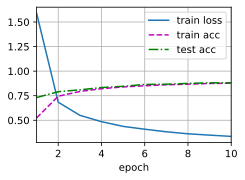

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
#@title 基于minst的CNN模型


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lis = []
for each in os.listdir(picpath):
  pic = cv2.imread(picpath + each)
  pic_new = cv2.resize(pic, dsize = (28, 28))
  gray = cv2.cvtColor(pic_new, cv2.COLOR_BGR2GRAY)
  lis.append(gray)

  plt.figure(figsize=(14,4))
  plt.subplot(1,3,1)
  plt.imshow(pic)
  plt.subplot(1,3,2)
  plt.imshow(pic_new)
  plt.subplot(1,3,3)
  plt.imshow(gray)
  plt.savefig(train_path + "/" + each, dpi = 100)
  plt.close()

In [ ]:
train_path = "train_pic"
os.mkdir(train_path)

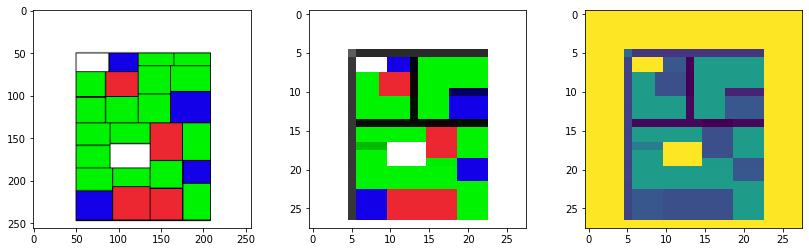

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.imshow(pic)
plt.subplot(1,3,2)
plt.imshow(pic_new)
plt.subplot(1,3,3)
plt.imshow(gray)

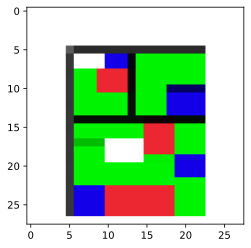

In [ ]:
plt.imshow(pic_new)

In [ ]:
gray = cv2.cvtColor(pic_new, cv2.COLOR_BGR2GRAY)
#ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

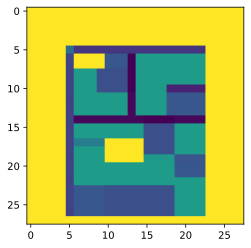

In [ ]:
plt.imshow(gray)

In [ ]:
X = np.array(lis)

In [ ]:
y = df["illu"].values.T

In [ ]:
y = df["energy"].values.T

In [ ]:
ind = y>1000

In [ ]:
y = y[ind]
X = X[ind]

In [ ]:
y = (y-y.min())/(y.max()-y.min())

In [ ]:
y = (y-0.5)/(1-0.5)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

320

https://github.com/rsyamil/cnn-regression#:~:text=cnn-regression.%20This%20is%20a%20simple%20guide%20to%20a,and%20has%20been%20widely%20used%20for%20classification%20problem.

In [ ]:
import keras
from keras.models import Model

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D, UpSampling1D
from keras.layers import Input, LeakyReLU, Reshape
from keras import backend as K

from keras.optimizers import Adam
from IPython.display import clear_output
from keras.callbacks import History 

#function to view training and validation losses
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss", c = 'green')
        plt.plot(self.x, self.val_losses, label="val_loss", c = 'red')
        plt.legend()
        plt.show()

In [ ]:
#define the convolutional neural network architecture

input_img = Input(shape=(X_train.shape[1], X_train.shape[1], 1)) 

_ = Conv2D(8, (3, 3), activation='linear', padding='same')(input_img)
_ = LeakyReLU(alpha=0.3)(_)
f1 = MaxPooling2D((2, 2), padding='same')(_)

_ = Conv2D(16, (4, 4), activation='linear', padding='same')(f1)
_ = LeakyReLU(alpha=0.3)(_)
f2 = MaxPooling2D((2, 2), padding='same')(_)

_ = Conv2D(32, (5, 5), activation='linear', padding='same')(f2)
_ = LeakyReLU(alpha=0.8)(_)
f3 = MaxPooling2D((2, 2), padding='same')(_)

_ = Reshape((16*32,))(f3)
_ = Dense(16)(_)
f4 = LeakyReLU(alpha=0.3)(_)

_ = Dense(32)(f4)
_ = LeakyReLU(alpha=0.3)(_)

_ = Dense(64)(_)
_ = LeakyReLU(alpha=0.3)(_)

out = Dense(3)(_)

In [ ]:
#set loss function, optimizer and compile

regression = Model(input_img, out)
opt = keras.optimizers.Adam(lr=1e-4)
regression.compile(optimizer=opt, 
                   loss="mse", 
                   metrics=['mse'])

#get summary of architecture parameters and plot arch. diagram
regression.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(regression, to_file='regression.png')

plot_losses = PlotLosses()

In [ ]:
import matplotlib.pyplot as plt

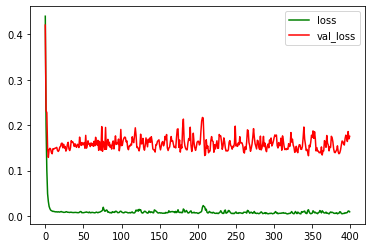

In [ ]:
#train the neural network

regression.fit(X_train, y_train,        
                epochs=400,
                batch_size=32,
                shuffle=True,
                validation_split=0.2,
                callbacks=[plot_losses])

In [ ]:
y_test_hat = regression.predict(X_test)

In [ ]:
y_test[:10]

array([0.474626, 0.56051 , 0.561904, 0.55205 , 0.588424, 0.578948,
       0.47561 , 0.584906, 0.55625 , 0.56923 ])

In [ ]:
y_test_hat[:10]

array([[0.481586  ],
       [0.2531059 ],
       [0.64101577],
       [0.51669025],
       [0.7414758 ],
       [0.775151  ],
       [0.6322825 ],
       [0.63548684],
       [0.5524678 ],
       [0.5038316 ]], dtype=float32)

In [ ]:
y_test_hat_1 = y_test_hat.mean(axis = 1)

In [ ]:
len(y_test_hat_1)

80

Text(0.5, 1.0, 'Test dataset')

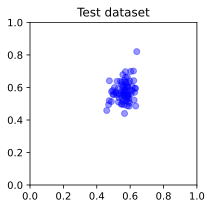

In [ ]:
#check the prediction vs actual data
plt.figure(figsize=[3, 3])
plt.scatter(y_test, y_test_hat_1, alpha=0.4, c='blue')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('Test dataset')